# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import processing as pr
import matplotlib.patches as patches

# Input

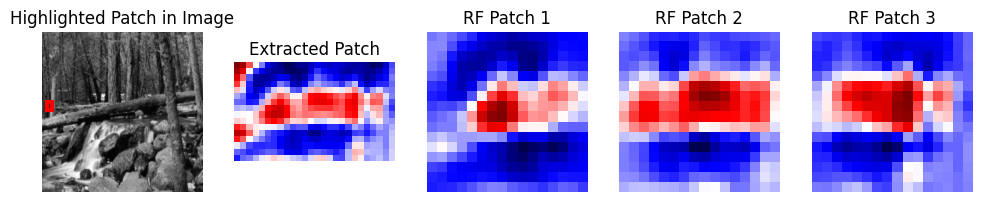

(1, 3, 16, 16)

In [129]:
prep = pr.Input()
    
sz = 512
# Read the input based on the given parameters
prep.input_read(input_type='image', file_format='.png', input_directory='./dataset/rao',
                data_type='processed', size=sz, channel=1, dt=2)

# Define the processing parameters
processing_params = {
    "zero_mean": True,
    "status": True,
    "type": "Whiten",
    "f_0": 200,
    "n": 4,
    "scale": 0.2
}
    
# Apply processing with the defined parameters
prep.processing(params=processing_params, save_directory="./new/")

# Create patches
patch_size=[16, 26]
prep.create_patch(patch_size=patch_size)

# Create RF patches with overlap
RF_size = [16, 16]                                  
prep.create_RFpatch(RF_size=RF_size, overlap_size=[6, 10], process_flg=True)
    
plot      = True  
image_idx = None  # Specify index or None for random
patch_idx = None      
if plot:
    # Plotting section
    fig, axs = plt.subplots(1, 5, figsize=(12, 60))
    
    # Select random indices if none are provided
    if image_idx is None:
        image_idx = np.random.randint(len(prep.input_mat))
    if patch_idx is None:
        patch_idx = np.random.randint(prep.RF_patches.shape[1])
    
   
    # Original image with patch highlighted
    nx = (sz - patch_size[0]) // (patch_size[0]) + 1
    y  = (patch_idx // nx ) * patch_size[0]
    x  = ((patch_idx) % nx) * patch_size[0]
    
    axs[0].imshow(image, cmap='gray')
    patch_rect = patches.Rectangle((x, y), patch_size[0], patch_size[1], linewidth=3, edgecolor='r', facecolor='none')
    axs[0].add_patch(patch_rect)
    axs[0].set_title('Highlighted Patch in Image')
    axs[0].axis('off')

    # Extracted patch itself
    extracted_patch = prep.patches_list[image_idx][patch_idx]
    axs[1].imshow(extracted_patch, cmap='seismic')
    axs[1].set_title('Extracted Patch')
    axs[1].axis('off')
    
    # Plot the selected RF patches
    ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[0]
    axs[2].imshow(ptch, cmap='seismic')
    axs[2].set_title('RF Patch 1')
    axs[2].axis('off')
    
    ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[1]
    axs[3].imshow(ptch, cmap='seismic')
    axs[3].set_title('RF Patch 2')
    axs[3].axis('off')
    
    ptch = np.squeeze(prep.RF_patches[image_idx, patch_idx])[2]
    axs[4].imshow(ptch, cmap='seismic')
    axs[4].set_title('RF Patch 3')
    axs[4].axis('off')
    
    plt.show()

prep.RF_patches[image_idx, patch_idx].shape